In [7]:
import pandas as pd
import root_pandas as rp
import matplotlib.pyplot as plt
import numpy as np
from analysis import analysis

In [2]:
E_cut = {'palila': 8, 'iiwi': 8.8, 'tako': 6, 'nene': 5.5, 'elepaio': 6, 'humu': 6.6}
a = analysis(E_cut = E_cut, E_cut_err = 0)

In [3]:
params = {}
params['LER_inj'] = a.get_fit_parameters("LER", "Cont_inj")
params['HER_inj'] = a.get_fit_parameters("HER", "Cont_inj")
params['LER_decay'] = a.get_fit_parameters("LER", "Decay")
params['HER_decay'] = a.get_fit_parameters("HER", "Decay")

 FCN=39.8405 FROM MINOS     STATUS=SUCCESSFUL     56 CALLS         521 TOTAL
                     EDM=1.42419e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.75302e-04   1.75153e-04  -1.39388e-06   3.43156e-01
   2  p1           0.00000e+00   6.46908e-08   7.11219e-08** at limit **
   3  p2           2.79671e-02   1.12017e-02   1.12017e-02   2.60889e-02
 FCN=79.8044 FROM MINOS     STATUS=SUCCESSFUL     48 CALLS         451 TOTAL
                     EDM=2.25591e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.08324e-03   2.52234e-04   7.02085e-08  -9.25990e-02
   2  p1           3.88578e-15   5.43757e-08   3.32970e-07** at limit **
   3  p2           4.20925e-02   

Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in

In [14]:
params['LER_inj']

{'iiwi_B0': 0.00037530195994117665,
 'iiwi_B1': 0.0,
 'iiwi_T': 0.027967140655644762,
 'iiwi_B0_err': 0.00017515256282102376,
 'iiwi_B1_err': 6.4690762746622e-08,
 'iiwi_T_err': 0.011201669846520879,
 'humu_B0': 0.0010832400631782813,
 'humu_B1': 3.885780586188048e-15,
 'humu_T': 0.04209246127412858,
 'humu_B0_err': 0.00025223373652655257,
 'humu_B1_err': 5.437565120391952e-08,
 'humu_T_err': 0.016104721823695378,
 'nene_B0': 0.000737207605525092,
 'nene_B1': 5.551115123125783e-16,
 'nene_T': 0.05585210488859682,
 'nene_B0_err': 0.00023778471619190222,
 'nene_B1_err': 7.144198205244479e-08,
 'nene_T_err': 0.015419188956040664,
 'tako_B0': 2.4774220240275646e-05,
 'tako_B1': 1.7541523789077473e-13,
 'tako_T': 8.052281064152567e-11,
 'tako_B0_err': 7.140368276092879e-06,
 'tako_B1_err': 2.2318288828149235e-07,
 'tako_T_err': 0.0018716693828743636,
 'elepaio_B0': 3.1139257838930234e-10,
 'elepaio_B1': 5.745504405574309e-08,
 'elepaio_T': 8.43769498715119e-12,
 'elepaio_B0_err': 0.00100252

In [4]:
data = {}
data['LER_inj'] = a.compute_means_and_errs("LER", "Cont_inj")
data['HER_inj'] = a.compute_means_and_errs("HER", "Cont_inj")
data['LER_decay'] = a.compute_means_and_errs("LER", "Decay")
data['HER_decay'] = a.compute_means_and_errs("HER", "Decay")
data['Lumi_inj'] = a.compute_means_and_errs("Lumi", "Cont_inj",bins=18)
data['Lumi_decay'] = a.compute_means_and_errs("Lumi", "Decay",bins=18)

In [5]:
data_full = {}
data_full['LER_inj'] = a.select_study("LER", "Cont_inj")
data_full['HER_inj'] = a.select_study("HER", "Cont_inj")
data_full['LER_decay'] = a.select_study("LER", "Decay")
data_full['HER_decay'] = a.select_study("HER", "Decay")
data_full['Lumi_inj'] = a.select_study("Lumi", "Cont_inj")
data_full['Lumi_decay'] = a.select_study("Lumi", "Decay")

In [7]:
for key in data.keys():
    for tpc in E_cut.keys():
        if key == 'LER_inj' or key =='LER_decay':
            ring = 'LER'
            data[key][tpc+'_base_pred'] = params[key][tpc+'_B0']*data[key]['I_'+ring]
            data[key][tpc+'_dyn_pred'] = params[key][tpc+'_B1']*data[key]['I_'+ring]**2
            data[key][tpc+'_tousch_pred'] = params[key][tpc+'_T']*data[key]['I_'+ring]**2/(data[key]['Sy_'+ring]*data[key]['Nb_'+ring])
            data[key][tpc+'_base_pred_err'] = np.sqrt((params[key][tpc+'_B0_err']/params[key][tpc+'_B0'])**2+(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
            data[key][tpc+'_dyn_pred_err'] = np.sqrt((params[key][tpc+'_B1_err']/params[key][tpc+'_B1'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
            data[key][tpc+'_tousch_pred_err'] = data[key][tpc+'_tousch_pred']*np.sqrt((params[key][tpc+'_T_err']/params[key][tpc+'_T'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2+ (data[key]['Sy_'+ring+'_err']/data[key]['Sy_'+ring]))
        elif key == 'HER_inj' or key =='HER_decay':
            ring = 'HER'
            data[key][tpc+'_base_pred'] = params[key][tpc+'_B0']*data[key]['I_'+ring]
            data[key][tpc+'_dyn_pred'] = params[key][tpc+'_B1']*data[key]['I_'+ring]**2
            data[key][tpc+'_tousch_pred'] = params[key][tpc+'_T']*data[key]['I_'+ring]**2/(data[key]['Sy_'+ring]*data[key]['Nb_'+ring])
            data[key][tpc+'_base_pred_err'] = np.sqrt((params[key][tpc+'_B0_err']/params[key][tpc+'_B0'])**2+(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
            data[key][tpc+'_dyn_pred_err'] = np.sqrt((params[key][tpc+'_B1_err']/params[key][tpc+'_B1'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
            data[key][tpc+'_tousch_pred_err'] = data[key][tpc+'_tousch_pred']*np.sqrt((params[key][tpc+'_T_err']/params[key][tpc+'_T'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2+ (data[key]['Sy_'+ring+'_err']/data[key]['Sy_'+ring]))
        else: #Lumi
            for ring in ['LER','HER']:
                for period in ['inj','decay']:
                    data[key][tpc+'_'+ring+'_base_pred'] = params[ring+'_'+period][tpc+'_B0']*data[key]['I_'+ring]
                    data[key][tpc+'_'+ring+'_dyn_pred'] = params[ring+'_'+period][tpc+'_B1']*data[key]['I_'+ring]**2
                    data[key][tpc+'_'+ring+'_tousch_pred'] = params[ring+'_'+period][tpc+'_T']*data[key]['I_'+ring]**2/(data[key]['Sy_'+ring]*data[key]['Nb_'+ring])
                    data[key][tpc+'_'+ring+'_base_pred_err'] = np.sqrt((params[ring+'_'+period][tpc+'_B0_err']/params[ring+'_'+period][tpc+'_B0'])**2+(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
                    data[key][tpc+'_'+ring+'_dyn_pred_err'] = np.sqrt((params[ring+'_'+period][tpc+'_B1_err']/params[ring+'_'+period][tpc+'_B1'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
                    data[key][tpc+'_'+ring+'_tousch_pred_err'] = data[key][tpc+'_'+ring+'_tousch_pred']*np.sqrt((params[ring+'_'+period][tpc+'_T_err']/params[ring+'_'+period][tpc+'_T'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2+ (data[key]['Sy_'+ring+'_err']/data[key]['Sy_'+ring]))
        

ZeroDivisionError: float division by zero

In [6]:
for key in data.keys():
    for tpc in E_cut.keys():
        for ring in ['LER','HER']:
            for period in ['inj','decay']:
                data[key][tpc+'_'+ring+'_base_pred'] = params[ring+'_'+period][tpc+'_B0']*data[key]['I_'+ring]
                data[key][tpc+'_'+ring+'_dyn_pred'] = params[ring+'_'+period][tpc+'_B1']*data[key]['I_'+ring]**2
                data[key][tpc+'_'+ring+'_tousch_pred'] = params[ring+'_'+period][tpc+'_T']*data[key]['I_'+ring]**2/(data[key]['Sy_'+ring]*data[key]['Nb_'+ring])
                data[key][tpc+'_'+ring+'_base_pred_err'] = np.sqrt((params[ring+'_'+period][tpc+'_B0_err']/params[ring+'_'+period][tpc+'_B0'])**2+(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
                data[key][tpc+'_'+ring+'_dyn_pred_err'] = np.sqrt((params[ring+'_'+period][tpc+'_B1_err']/params[ring+'_'+period][tpc+'_B1'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2)
                data[key][tpc+'_'+ring+'_tousch_pred_err'] = data[key][tpc+'_'+ring+'_tousch_pred']*np.sqrt((params[ring+'_'+period][tpc+'_T_err']/params[ring+'_'+period][tpc+'_T'])**2+2*(data[key]['I_'+ring+'_err']/data[key]['I_'+ring])**2+ (data[key]['Sy_'+ring+'_err']/data[key]['Sy_'+ring]))
        

ZeroDivisionError: float division by zero

In [7]:
for tpc in E_cut.keys():
    for period in ['Lumi_inj','Lumi_decay']:
    ### Compute rate for lumi fits
        data[period][tpc+'_scaled_rate'] = data[period][tpc+'_neutrons'] - (data[period][tpc+'_LER_tousch_pred']+data[period][tpc+'_LER_base_pred']+data[period][tpc+'_LER_dyn_pred']
         + data[period][tpc+'_HER_tousch_pred']+data[period][tpc+'_HER_base_pred']+data[period][tpc+'_HER_dyn_pred'])

# Plot single period

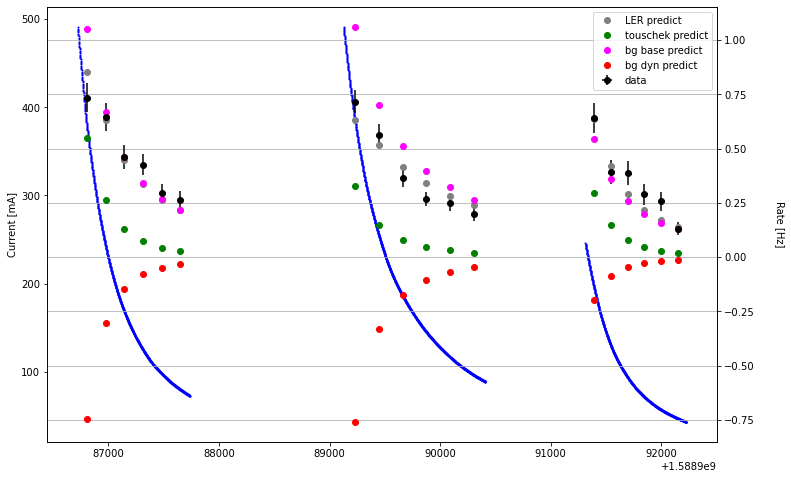

In [10]:
tpc = 'nene'
period = 'LER_decay'
ring = 'LER'

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(data_full[period]['ts'],data_full[period]['I_'+ring],'o',color = 'blue',markersize=1)
#ax.plot(data[period]['ts'],data[period]['Nb_LER']/5,'o',color = 'k')
ax.set_ylabel('Current [mA]')
ax1=ax.twinx()
#ax1.errorbar(data[period]['ts'],data[period][tpc+'_tousch_pred']+data[period][tpc+'_base_pred']+data[period][tpc+'_dyn_pred'],np.sqrt(data[period][tpc+'_tousch_pred_err']**2 + data[period][tpc+'_base_pred_err']**2),[0 for i in range(0,len(data[period]))],'o',color = 'gray',label='fit predict')
ax1.plot(data[period]['ts'],data[period][tpc+'_LER_tousch_pred']+data[period][tpc+'_LER_base_pred']+data[period][tpc+'_LER_dyn_pred'],'o',color = 'gray',label='LER predict')
#ax1.plot(data[period]['ts'],data[period][tpc+'_HER_tousch_pred']+data[period][tpc+'_HER_base_pred']+data[period][tpc+'_LER_dyn_pred'],'o',color = 'green',label='HER predict')
ax1.plot(data[period]['ts'],data[period][tpc+'_LER_tousch_pred'],'o',color = 'green',label='touschek predict')
ax1.plot(data[period]['ts'],data[period][tpc+'_LER_base_pred'],'o',color = 'magenta',label='bg base predict')
ax1.plot(data[period]['ts'],data[period][tpc+'_LER_dyn_pred'],'o',color = 'red',label='bg dyn predict')
#ax1.plot(data[period]['ts'],data[period][tpc+'_LER_dyn_pred'],'o',color = 'cyan',label='bg dyn predict')
ax1.errorbar(data[period]['ts'],data[period][tpc+'_neutrons'],data[period][tpc+'_neutrons_err'],[0 for i in range(0,len(data[period]))],'o',color = 'k',label = 'data')
ax1.set_ylabel('Rate [Hz]',rotation=270, labelpad=30)
ax1.grid()
ax1.legend()

# Lumi

Text(0, 0.5, '$R_L$ [Hz]')

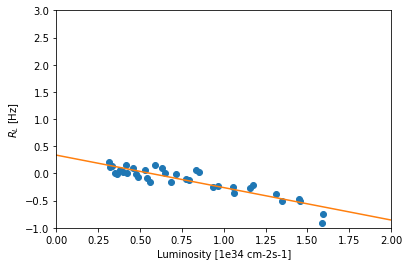

In [193]:
from scipy.optimize import curve_fit

tpc = 'humu'
period = 'Lumi_decay'

def func(x,a,b):
    return a * x + b

popt,pcov = curve_fit(func, (data[period]['ECL_lumi']/10000), data[period][tpc+'_scaled_rate'])
plt.plot(data[period]['ECL_lumi']/10000, data[period][tpc+'_scaled_rate'],'o')
x = np.linspace(0,2,101)
plt.plot(x,popt[0]*x+popt[1])
plt.xlim(0,2)
plt.ylim(-1,3)
plt.xlabel('Luminosity [1e34 cm-2s-1]')
plt.ylabel(r'$R_L$ [Hz]')

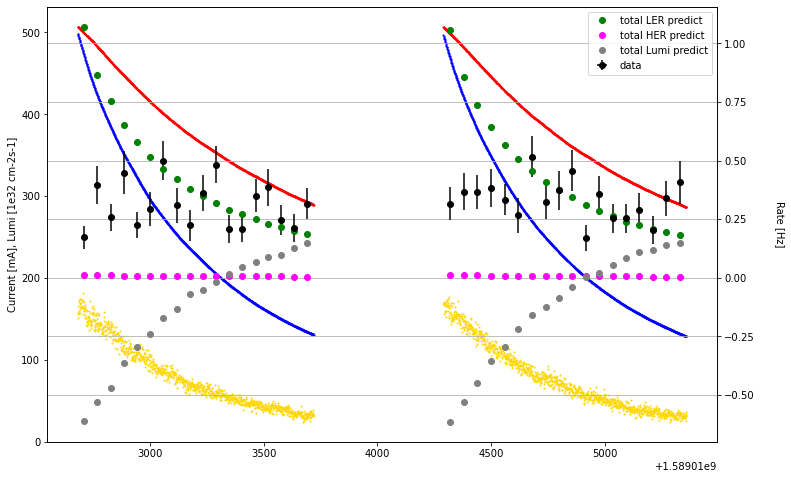

In [194]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(data_full[period]['ts'],data_full[period]['I_LER'],'o',color = 'blue',markersize=1)
ax.plot(data_full[period]['ts'],data_full[period]['I_HER'],'o',color = 'red',markersize=1)
ax.plot(data_full[period]['ts'],data_full[period]['ECL_lumi']/100,'o',color = 'gold',markersize=1)
#ax.plot(data[period]['ts'],data[period]['Nb_LER']/5,'o',color = 'k')
ax.set_ylabel('Current [mA], Lumi [1e32 cm-2s-1]')
ax1=ax.twinx()
#ax1.errorbar(data[period]['ts'],data[period][tpc+'_tousch_pred']+data[period][tpc+'_base_pred']+data[period][tpc+'_dyn_pred'],np.sqrt(data[period][tpc+'_tousch_pred_err']**2 + data[period][tpc+'_base_pred_err']**2),[0 for i in range(0,len(data[period]))],'o',color = 'gray',label='fit predict')
ax1.plot(data[period]['ts'],data[period][tpc+'_LER_tousch_pred']+data[period][tpc+'_LER_base_pred']+data[period][tpc+'_LER_dyn_pred'],'o',color = 'green',label='total LER predict')
ax1.plot(data[period]['ts'],data[period][tpc+'_HER_tousch_pred']+data[period][tpc+'_HER_base_pred']+data[period][tpc+'_HER_dyn_pred'],'o',color = 'magenta',label='total HER predict')
ax1.plot(data[period]['ts'],popt[0]*data[period]['ECL_lumi']/10000+popt[1],'o',color = 'gray',label='total Lumi predict')
ax1.errorbar(data[period]['ts'],data[period][tpc+'_neutrons'],data[period][tpc+'_neutrons_err'],[0 for i in range(0,len(data[period]))],'o',color = 'k',label = 'data')
ax1.set_ylabel('Rate [Hz]',rotation=270, labelpad=30)
ax1.grid()
ax1.legend()

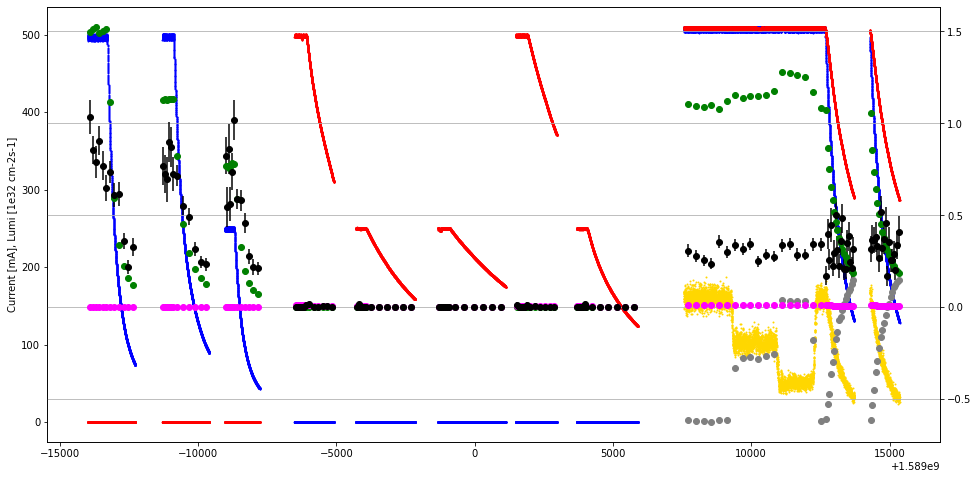

In [196]:
fig,ax = plt.subplots(figsize=(16,8))
ax1=ax.twinx()
ax.set_ylabel('Current [mA], Lumi [1e32 cm-2s-1]')
for period in ['LER_inj', 'LER_decay','HER_inj', 'HER_decay', 'Lumi_inj', 'Lumi_decay']:
    ax.plot(data_full[period]['ts'],data_full[period]['I_LER'],'o',color = 'blue',markersize=1)
    ax.plot(data_full[period]['ts'],data_full[period]['I_HER'],'o',color = 'red',markersize=1)
    if period == 'Lumi_decay' or period == 'Lumi_inj':
        ax.plot(data_full[period]['ts'],data_full[period]['ECL_lumi']/100,'o',color = 'gold',markersize=1)
        ax1.plot(data[period]['ts'],popt[0]*data[period]['ECL_lumi']/10000+popt[1],'o',color = 'gray',label='total Lumi predict')
    ax1.plot(data[period]['ts'],data[period][tpc+'_LER_tousch_pred']+data[period][tpc+'_LER_base_pred']+data[period][tpc+'_LER_dyn_pred'],'o',color = 'green',label='total LER predict')
    ax1.plot(data[period]['ts'],data[period][tpc+'_HER_tousch_pred']+data[period][tpc+'_HER_base_pred']+data[period][tpc+'_HER_dyn_pred'],'o',color = 'magenta',label='total HER predict')
    ax1.errorbar(data[period]['ts'],data[period][tpc+'_neutrons'],data[period][tpc+'_neutrons_err'],[0 for i in range(0,len(data[period]))],'o',color = 'k',label = 'data')
    
ax1.grid()
#ax1.legend()